# Desafio:

O desafio a seguir é parte do Bootcamp Ciência de Dados 2023, realizado na plataforma Dio e patrocinado pelo Santander. Conforme solicitado, fomos desafiados a reimaginar o processo de ETL e aplicá-lo de acordo com nossa abordagem. Realizei minhas alterações e espero que gostem do resultado.

# O que temos:

Temos 1 base de dados com informações dos clientes, tanto clientes atuais quanto clientes que cancelaram o cartão

Download da Base de Dados: Botão na página

Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Passo 1: Importar a base de dados (Extract)
- Passo 2: Visualizar e tratar essa base de dados (Transform)
- Passo 4: Salvar a nova base de dados (Load)

## Passo 1: Extract
Importando bibliotecas


In [4]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dio/ClientesBanco.csv", encoding="latin1")
tabela = tabela.drop("CLIENTNUM", axis=1)
display(tabela)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.000,1144,42,1625.000,0.061
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.000,1291,33,3714.000,0.105
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.000,1887,20,2333.000,0.000
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.000,1171,20,2333.000,0.760
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.000,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cliente,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Passo 2: Transform
Agora vamos tratar valores vazios e exibir um resumo das colunas da base de dados

In [6]:
tabela = tabela.dropna()
display(tabela.info())

display(tabela.describe().round(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10126 non-null  object 
 1   Idade                          10126 non-null  int64  
 2   Sexo                           10126 non-null  object 
 3   Dependentes                    10126 non-null  int64  
 4   Educação                       10126 non-null  object 
 5   Estado Civil                   10126 non-null  object 
 6   Faixa Salarial Anual           10126 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10126 non-null  int64  
 9   Produtos Contratados           10126 non-null  int64  
 10  Inatividade 12m                10126 non-null  int64  
 11  Contatos 12m                   10126 non-null  int64  
 12  Limite                         10126 non-null 

None

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0
mean,46.3,2.3,35.9,3.8,2.3,2.5,8632.0,1162.8,7469.2,108.7,4404.4,64.9,66.6,0.3
std,8.0,1.3,8.0,1.6,1.0,1.1,9089.2,815.0,9091.1,353.9,3397.2,23.5,284.0,0.3
min,26.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0
25%,41.0,1.0,31.0,3.0,2.0,2.0,2555.0,358.0,1324.2,0.6,2156.0,45.0,0.6,0.0
50%,46.0,2.0,36.0,4.0,2.0,2.0,4549.0,1276.0,3473.0,0.7,3899.5,67.0,0.7,0.2
75%,52.0,3.0,40.0,5.0,3.0,3.0,11067.8,1784.0,9860.0,0.9,4741.0,81.0,0.8,0.5
max,73.0,5.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3397.0,18484.0,139.0,3714.0,1.0


### Avaliando a distribuição de clientes por estado civil

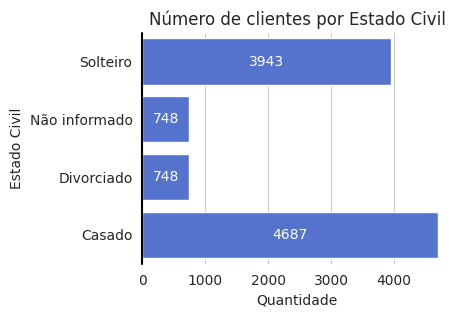

In [9]:
# colocando em ordem os dados pelo sexo
df = tabela.sort_values(by='Estado Civil', ascending=False)
# Definindo o estilo do grafico
sns.set_style("whitegrid")

# definindo tamanho da figura
plt.figure(figsize=(4, 3))
# Plotando um grafico de barras contando a quantidade de individuoes por Estado Civil
ax = sns.countplot(data=df, y='Estado Civil', color='royalblue')
#Definindo nome dos eixos
plt.ylabel('Estado Civil')
plt.xlabel('Quantidade')
plt.title('Número de clientes por Estado Civil')
# Colocando os valores de cada coluna
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    label_type='center',
    color='white'
)
# Removendo as bordas do gráfico
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

### Analisando a dispersão de clientes que cancelaram de acordo com o estado civil

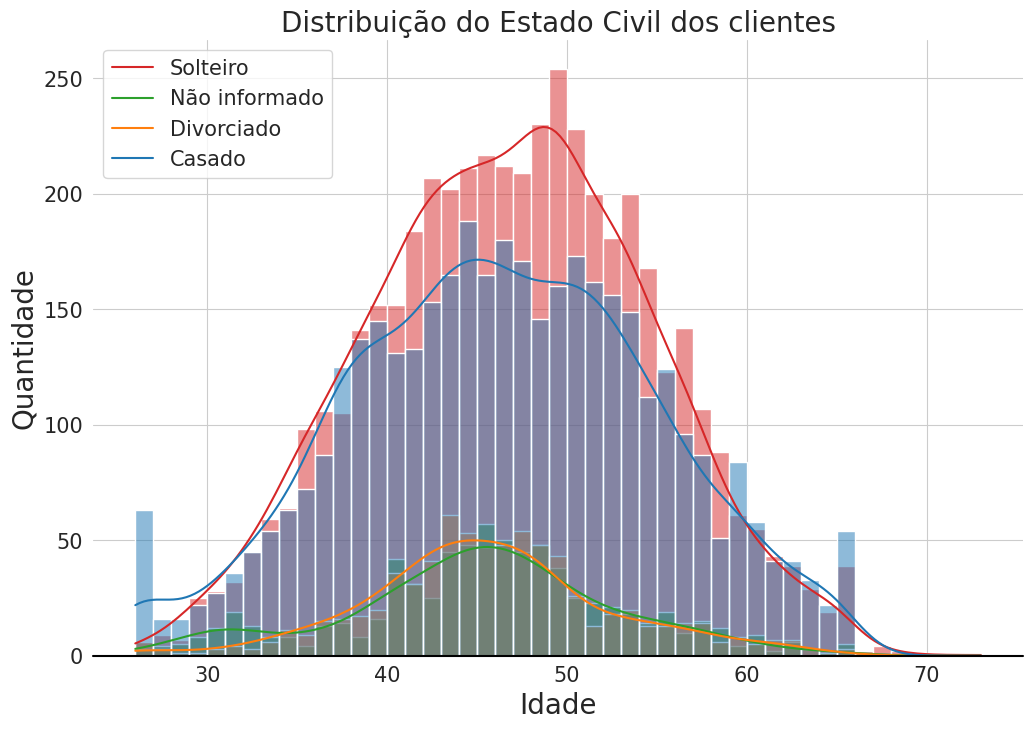

In [17]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Idade', kde=True, hue='Estado Civil',legend=False)

plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Idade',fontsize=20)
plt.title('Distribuição do Estado Civil dos clientes',fontsize=20)
plt.legend(title='', loc='upper left', labels=df['Estado Civil'].unique(),fontsize=15)

# retirando bordas
ax.tick_params(labelsize=15)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

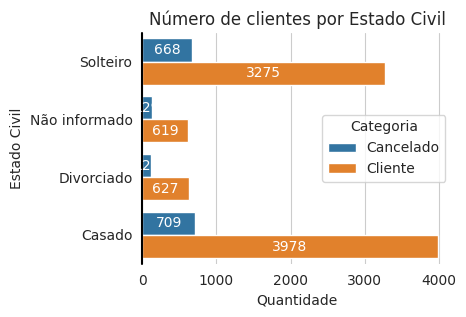

In [19]:
# colocando em ordem os dados pelo sexo
df = tabela.sort_values(by='Estado Civil', ascending=False)
# Definindo o estilo do grafico
sns.set_style("whitegrid")

# definindo tamanho da figura
plt.figure(figsize=(4, 3))
# Plotando um grafico de barras contando a quantidade de individuoes por Estado Civil
ax = sns.countplot(data=df, y='Estado Civil', hue='Categoria')
#Definindo nome dos eixos
plt.ylabel('Estado Civil')
plt.xlabel('Quantidade')
plt.title('Número de clientes por Estado Civil')
# Colocando os valores de cada coluna
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    label_type='center',
    color='white'
)
ax.bar_label(
    ax.containers[1],
    fmt='%.0f',
    label_type='center',
    color='white'
)
# Removendo as bordas do gráfico
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

### Criando uma mensagem oferecendo credito para evitar evação de clientes solteiros e casados

In [108]:
def credito(cliente):
    estado_civil = ['Casado','Solteiro']
    if cliente in estado_civil:
        return "Temos uma linha de crédito especial para você!"
    else:
        return "Sem crédito especial"


In [109]:
df2["Mensagem"] = df2["Estado Civil"].apply(credito)
df2.head()

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,...,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão,Mensagem
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061,Temos uma linha de crédito especial para você!
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105,Temos uma linha de crédito especial para você!
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000,Temos uma linha de crédito especial para você!
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760,Sem crédito especial
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000,Temos uma linha de crédito especial para você!


# Vamos avaliar como está a divisão entre Clientes x Cancelados

In [7]:
qtde_categoria = tabela["Categoria"].value_counts()
display(qtde_categoria)

qtde_categoria_perc = tabela["Categoria"].value_counts(normalize=True)
display(qtde_categoria_perc)

Cliente      8499
Cancelado    1627
Name: Categoria, dtype: int64

Cliente      0.839325
Cancelado    0.160675
Name: Categoria, dtype: float64

### Passo 3: Load
Exportando itens

In [111]:
df2.to_csv("arquivo_final.csv")